# **Seminar: Politische Debatten & Polarisierung im Bundestag**
## Sentimentanalyse im Kontext von Corona

In [25]:
# Import Basic Packages
import numpy as np                 # Numpy
import pandas as pd                 #Datafrane

# Import Visualization Packages
from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as plt   # Für Visualisierung
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordcloud erstellen
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp


# Import NLP Packages
import nltk
import spacy

In [45]:
# Methoden aus anderem File importieren
import Sentiment_Methods

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


c:\Users\paula\anaconda3\envs\env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Datensatz einlesen

In [36]:
# df Legislaturperiode 2019 (24.10.2017-26.09.21)
# Import des vorselektierten Dataframes mit gegebenen Sentiment 
df_sentiment19 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\modellorginal.csv")
df_sentiment19['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment19.sort_values(by='date')

# df Legislaturperiode 2020 (24.10.2017-26.09.21)


,Unnamed: 0,satz,id,period,date,name,party,redner_id,discussion_title,text,tokenized_text,tokens,cleaned_text,Sentiment_Label,Sentiment_Score
19286,20026,Europa und die Globalisierung: Das ist heute d...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['Europa', 'Globalisierung', 'heute', 'Rahmen'...",Europa Globalisierung heute Rahmen debattieren...,neutral,0.999854
19187,19927,Er war zwölf Jahre ein großartiger Bundestagsp...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['zwölf', 'Jahre', 'großartiger', 'Bundestagsp...",zwölf Jahre großartiger Bundestagspräsident,neutral,0.999984
19186,19926,"Vor allen Dingen aber, meine sehr verehrten Da...",ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['Dingen', 'verehrten', 'möchte', 'Norbert', '...",Dingen verehrten möchte Norbert Lammert danken,neutral,0.958987
19185,19925,Damit nehme ich jetzt die Wahl vorweg; das ist...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['nehme', 'Wahl', 'vorweg', 'bisschen', 'schwi...",nehme Wahl vorweg bisschen schwierig,positive,0.843615
19184,19924,Ich danke natürlich auch den beiden Vizepräsid...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['danke', 'natürlich', 'beiden', 'Vizepräsiden...",danke natürlich beiden Vizepräsidentinnen näch...,neutral,0.978398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48520,50363,"Aber, meine Damen und Herren, im Großen und Ga...",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Großen', 'Ganzen', 'deutliche', 'Fortschritt...",Großen Ganzen deutliche Fortschritte gemacht r...,positive,0.962056
48519,50362,"Es gibt kleine Schwierigkeiten nach wie vor, a...",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['gibt', 'kleine', 'Schwierigkeiten', 'vielen'...",gibt kleine Schwierigkeiten vielen Stellen gra...,neutral,0.999985
48518,50361,"Das sind Dinge, die kann man benennen.",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Dinge', 'benennen']",Dinge benennen,negative,0.708503
48527,50370,Deshalb kann man sagen: Als ich 2005 Bundeskan...,ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Deshalb', 'sagen', '2005', 'Bundeskanzlerin'...",Deshalb sagen 2005 Bundeskanzlerin wurde lagen...,neutral,0.986180


## 3. Deskriptive Datenanalyse

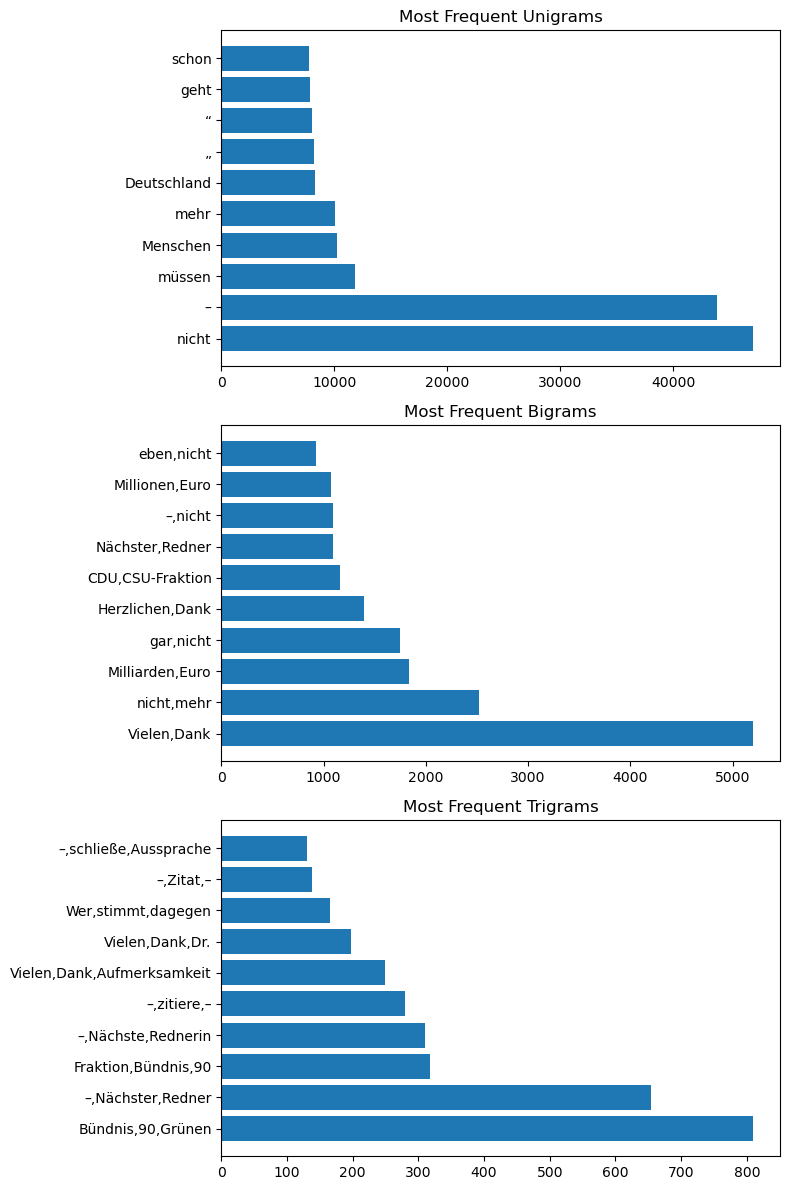

In [46]:
ngram_19 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment19)

In [ ]:
# Wir sehen auf Basis dessen, dass 

## 5. Sentimentanalyse

In [ ]:
plot_sentiment_analysis(modell_original, modell_processed)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [43]:
Methoden_Sentiment.plot_sentiment_wordclouds (df_sentiment19)

AttributeError: module 'Methoden_Sentiment' has no attribute 'plot_sentiment_wordclouds'

### Sentiment-Analyse nach Parteizugehörigkeit

In [44]:
# Plotten nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
Methoden_Sentiment.plot_sentiment_by_party(df_sentiment19)

#plot_sentiment_by_party(df_sentiment19)



AttributeError: module 'Methoden_Sentiment' has no attribute 'plot_sentiment_by_party'